In [3]:
import pandas as pd
# Trespass Towing Report
tows = pd.read_csv('tows.csv',
                  parse_dates=['Tow Date'])
complaints = pd.read_csv('FY24 Trespass Tow Complaints(FY24 Trespass Tow Cases).csv',
                         parse_dates=['Create Date', 'Assigned Date', 'Closed Date'],
                         encoding='latin-1')

# Suppress scientific notation (for the GEOID)
pd.options.display.float_format = '{:.0f}'.format

In [46]:
len(tows)

93059

In [22]:
len(tows[tows['Trade Name'] == 'Metro Investigation & Recovery Solutions'])

26

In [19]:
tows.groupby('Trade Name').size().sort_values(ascending=False)

Trade Name
Henry's Wrecker Service                     36559
Authorized Towing                           16444
Prestige Autow                               9976
Speedy Towing                                7238
Big Tow                                      3571
Auburn Towing, Inc.                          3155
Millers's Towing & Recovery, LLC             2379
Drive?                                       2378
Ricky's Towing & Recovery, LLC               2020
Diversified Recovery                         1471
EC?                                          1141
Unknown                                      1036
A1 Parking Management                         869
K&D                                           852
Grace Towing and Recovery, LLC                824
LED?                                          586
TRP?                                          551
On the Run Towing?                            341
E & S Towing Service                          206
Custom Towing & Auto Repair            

In [7]:
complaint_companies

Merchant
Henry's Wrecker Service                          45
Prestige Autow                                   12
Speedy Towing                                    12
Authorized Towing                                11
Miller's Towing & Recovery, LLC                   4
Big Tow                                           4
Diversified Recovery                              4
Automotive Support Towing & Recovery              2
Prince George Towing                              2
Ricky's Towing & Recovery LLC                     2
3 Star Towing LLC                                 1
Randolph Square Apartments                        1
On The Run Towing                                 1
Potomac Oaks Condominuim                          1
Quick Response Towing, Inc                        1
Silver Spring Towing                              1
SPEEDY TOWING INC                                 1
No match found                                    1
TKVA (dba 'Tow Kingz)                             1
Van

In [2]:
complaints.groupby('Merchant').size().sort_values(ascending=False)

Merchant
Henry's Wrecker Service                          39
Authorized Towing                                 9
Prestige Towing                                   6
Speedy Towing                                     5
Big Tow                                           4
Miller's Towing & Recovery, LLC                   4
Prestige Towing & Recovery                        4
Speedy Towing & Recovery                          4
Diversified Recovery                              4
Speedy Towing, Inc.                               2
Ricky's Towing & Recovery LLC                     2
Prince George Towing                              2
Henry Wrecker Service                             2
Prestige Autow                                    2
Automotive Support Towing & Recovery              2
Authorized Towing LLC                             2
Potomac Oaks Condominuim                          1
Quick Response Towing, Inc                        1
On The Run Towing                                 1
3 S

In [4]:
import matplotlib.pyplot as plt

In [9]:
tows['Trade Name'] = tows['Trade Name'].mask(tows['Trade Name'] == "Prestige?", "Prestige Autow")


In [14]:

tows.to_csv('tows.csv', index=False)


##### How many cars were towed nonconsensually July 1, 2021 - June 30, 2024?


In [2]:
len(tows)

102823

##### How many cars per year in this time period?


In [6]:
tows_by_year = tows.groupby(tows['Incident Date'].dt.year).size()
tows_by_year


Incident Date
2021    13456
2022    31153
2023    34572
2024    20588
dtype: int64

##### What are the most popular reasons for towing?

In [4]:
tows_by_reason = tows.groupby('Reason for tow').size()
tows_by_reason

Reason for tow
ABN                1463
DAV                 213
DBL                  36
EXP                4870
FAKE                  1
FIRE               3648
HANDICAP             79
INVALID PERMIT       80
MNG                  20
NO PERMIT           114
NOP               49882
PKG               22934
PVT                8732
REPO               9764
STOLEN                3
UNPAID                6
Unknown              18
VISIT                32
WALK                 60
dtype: int64

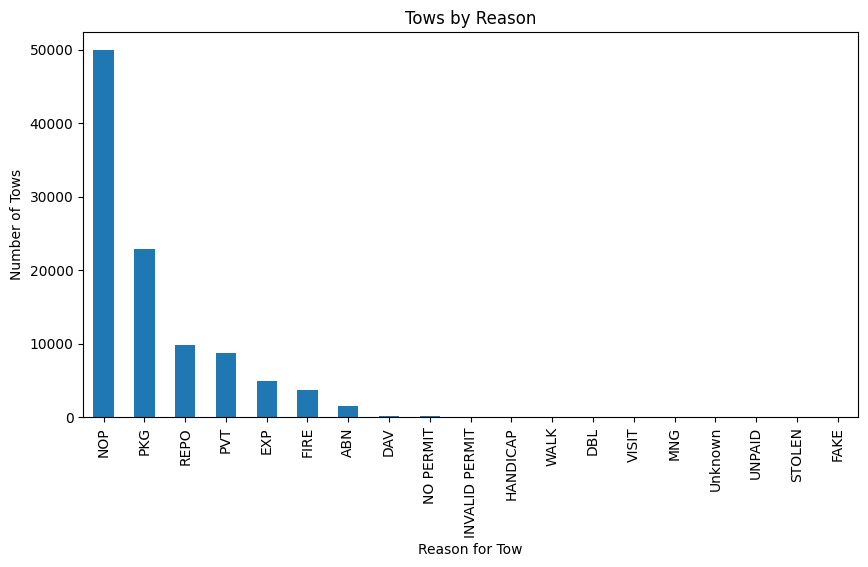

In [7]:
# Tows by Reason Bar Chart
tows_by_reason.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Tows by Reason')
plt.xlabel('Reason for Tow')
plt.ylabel('Number of Tows')
plt.show()


##### "No overnight parking" is the most popular reason for towing nonconsensually. It is responsible for approximately 50% of all tows from the 2021 fiscal year to the 2024 fiscal year. Are there any trends over time for this reason?

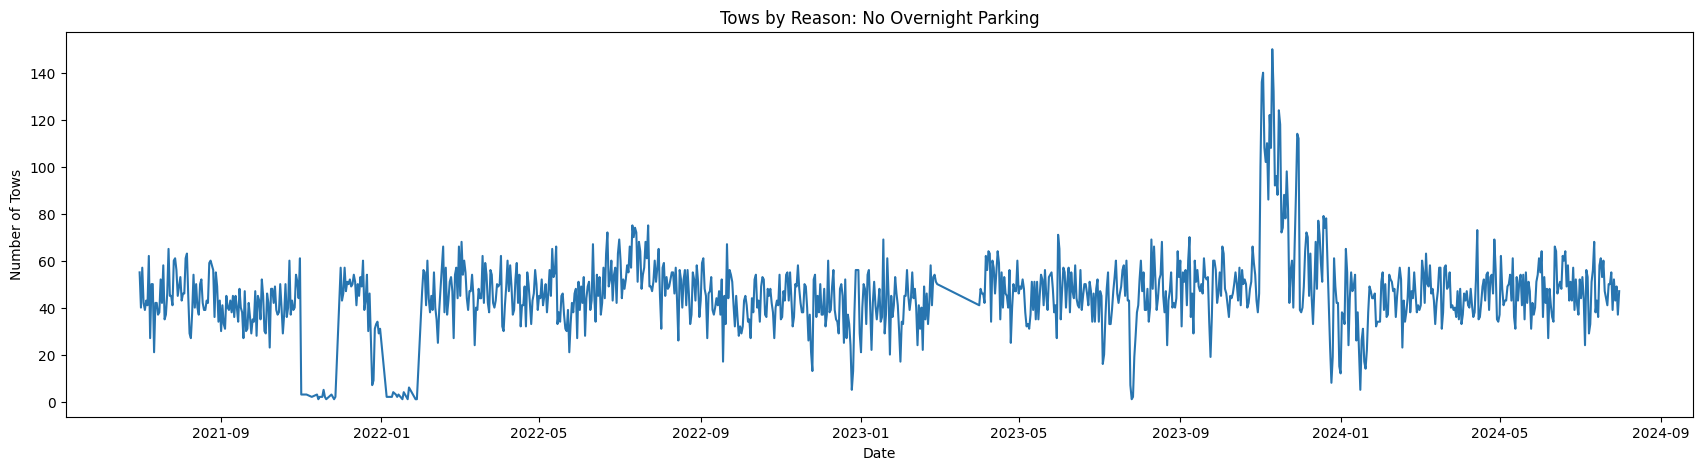

In [39]:
tows_nop = tows[tows['Reason for tow'] == 'NOP']
tows_nop_ts = tows_nop.groupby('Incident Date').size()

# Plot the time series
plt.figure(figsize=(21, 5))
plt.plot(tows_nop_ts.index, tows_nop_ts.values,  linestyle='-', color='#2875b0')
plt.title('Tows by Reason: No Overnight Parking')
plt.xlabel('Date')
plt.ylabel('Number of Tows')
plt.show()



##### And how does this compare to the rest?

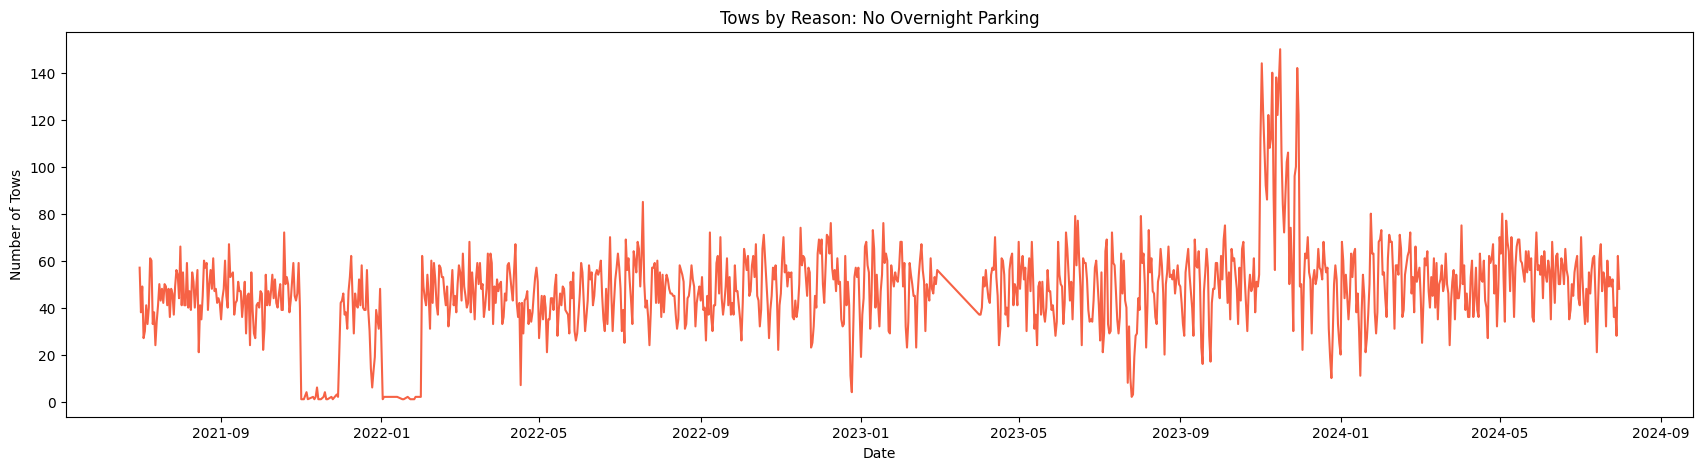

In [38]:
tows_not_nop = tows[tows['Reason for tow'] != 'NOP']
tows_not_nop_ts = tows_not_nop.groupby('Incident Date').size()

# Plot the time series
plt.figure(figsize=(21, 5))
plt.plot(tows_not_nop_ts.index, tows_not_nop_ts.values,  linestyle='-', color='#f66245')
plt.title('Tows by Reason: No Overnight Parking')
plt.xlabel('Date')
plt.ylabel('Number of Tows')
plt.show()

These timeseries graphs look very similar, indicating the patterns of "no overnight parking" have not differed from those of other towing reasons.

##### What are the most popular tow companies?




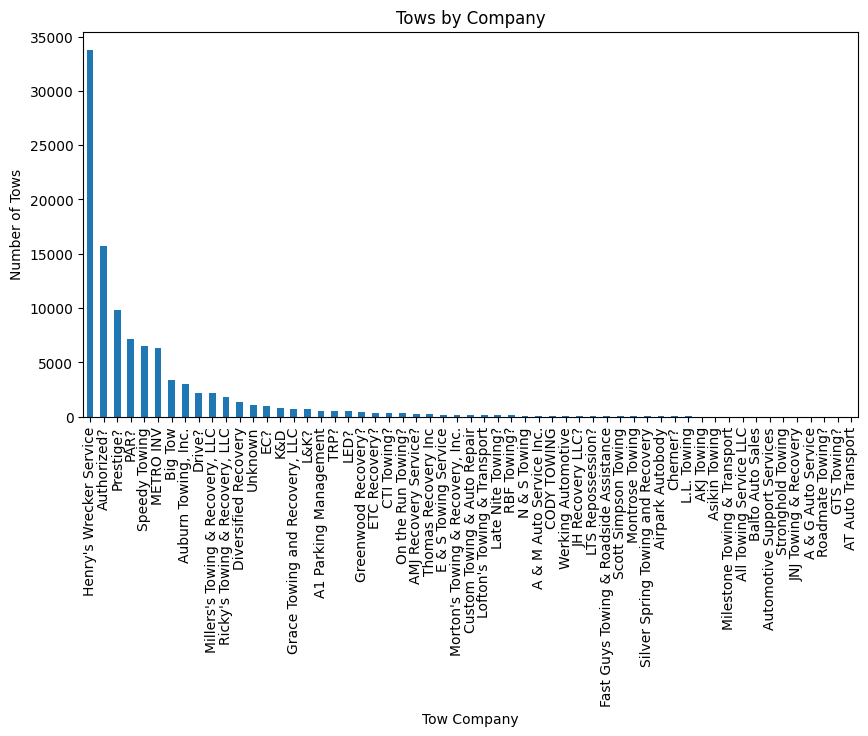

In [42]:
tows_by_company = tows.groupby('Trade Name').size()
tows_by_company
# Tows by Company Bar Chart
tows_by_company.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Tows by Company')
plt.xlabel('Tow Company')
plt.ylabel('Number of Tows')
plt.show()

In [9]:
# Filtering for the top 5 tow companies

tows_henry = tows[tows['Trade Name'] == "Henry's Wrecker Service"]

tows_auth = tows[tows['Trade Name'] == 'Authorized?']

tows_pres = tows[tows['Trade Name'] == 'Prestige?']

tows_par = tows[tows['Trade Name'] == 'PAR?']

tows_speedy = tows[tows['Trade Name'] == 'Speedy Towing']


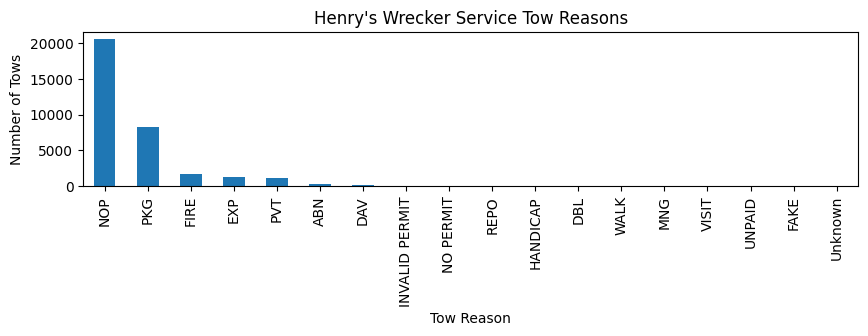

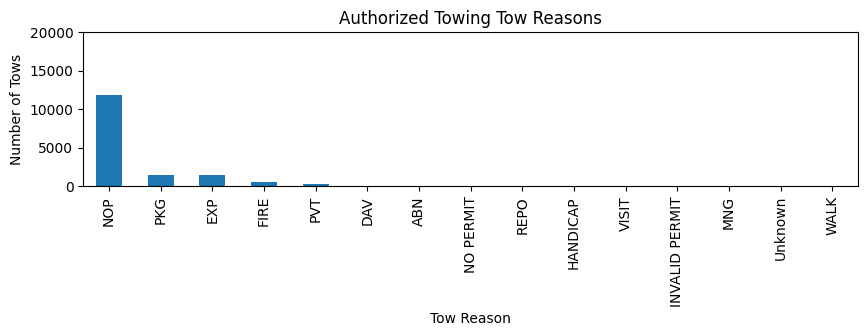

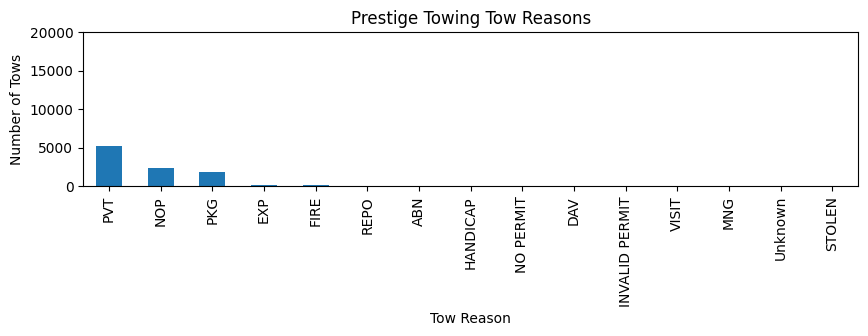

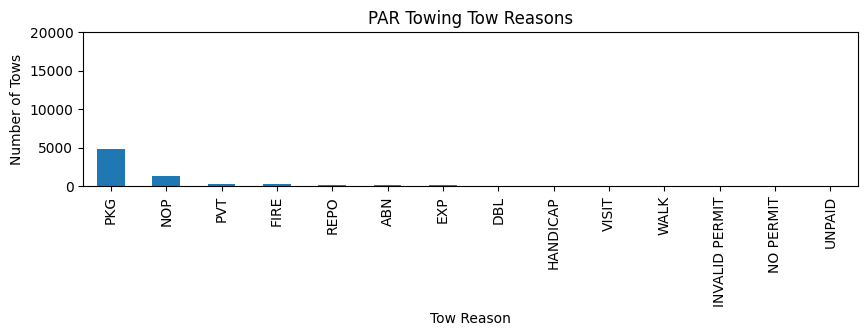

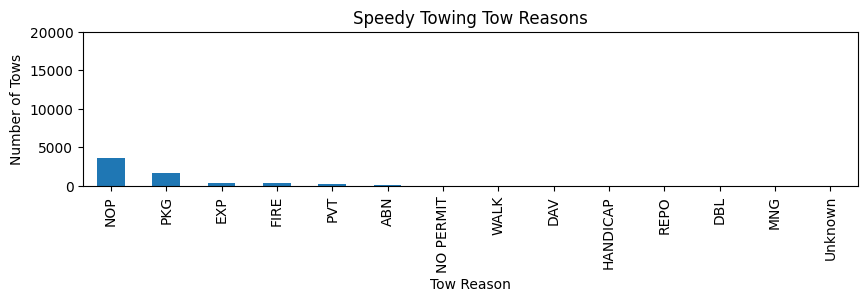

In [19]:
tows_henry.groupby('Reason for tow').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 2))
plt.title("Henry's Wrecker Service Tow Reasons")
plt.xlabel('Tow Reason')
plt.ylabel('Number of Tows')
plt.show()

tows_auth.groupby('Reason for tow').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 2))
plt.title("Authorized Towing Tow Reasons")
plt.xlabel('Tow Reason')
plt.ylabel('Number of Tows')
plt.ylim(0, 20000)
plt.show()

tows_pres.groupby('Reason for tow').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 2))
plt.title("Prestige Towing Tow Reasons")
plt.xlabel('Tow Reason')
plt.ylabel('Number of Tows')
plt.ylim(0, 20000)
plt.show()

tows_par.groupby('Reason for tow').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 2))
plt.title("PAR Towing Tow Reasons")
plt.xlabel('Tow Reason')
plt.ylabel('Number of Tows')
plt.ylim(0, 20000)    
plt.show()

tows_speedy.groupby('Reason for tow').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 2))
plt.title("Speedy Towing Tow Reasons")
plt.xlabel('Tow Reason')
plt.ylabel('Number of Tows')
plt.ylim(0, 20000)
plt.show()

Although "no overnight parking" is the most common reason for towing, it is not the most common reason for towing for all of the top tow companies. Prestige conducted the most tows on cars parked improperly on private property.

What if the data is filtered for just the fiscal year of 2024? How do the rankings of tow companies differ in comparison to the ranking of most complaints recieved?

In [43]:
tows_24 = tows[(tows['Incident Date'] >= '2023-07-01') &
                (tows['Incident Date'] <= '2024-06-30')]

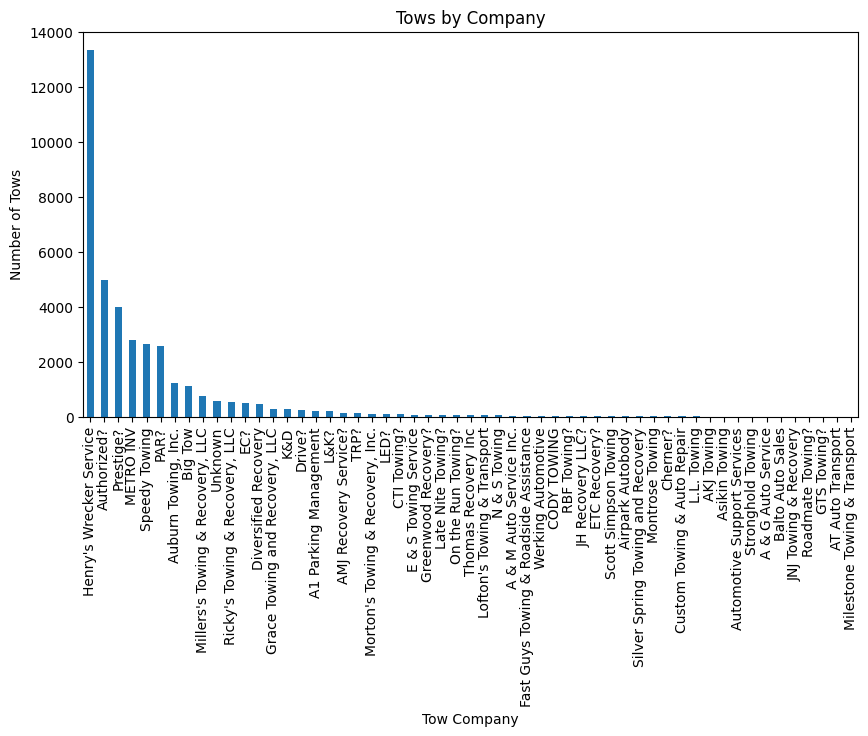

In [44]:
tows_by_company_24 = tows_24.groupby('Trade Name').size()
tows_by_company_24
# Tows by Company Bar Chart
tows_by_company_24.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Tows by Company (Fiscal Year 2024)')
plt.xlabel('Tow Company')
plt.ylabel('Number of Tows')
plt.show()

In [54]:
tows_by_company_time = tows.groupby(['Trade Name', 'Tow Date']).size()


In [60]:
tows_by_company_time = (tows.groupby(['Trade Name', 'Tow Date'])
                           .size()
                           .reset_index(name='Value')
                           )

In [68]:
top_5 = ["Henry's Wrecker Service", 'Authorized?', 'Prestige?', 'PAR?', 'Speedy Towing']
tows_by_company_time_5 = tows_by_company_time[tows_by_company_time['Trade Name'].isin(top_5)]

In [73]:
import plotly.express as px

fig = px.parallel_categories(tows_by_company_time_5, 
                           dimensions=["Value", "Value"],
                           color="Trade Name",  # Use the numeric 'Value' column for coloring
                           color_continuous_scale=px.colors.qualitative.Set3)  # Choose a color scale
fig.show()

ValueError: 
    Invalid element(s) received for the 'color' property of parcats.line
        Invalid elements include: ['Authorized?', 'Authorized?', 'Authorized?', 'Authorized?', 'Authorized?', 'Authorized?', 'Authorized?', 'Authorized?', 'Authorized?', 'Authorized?']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to parcats.line.colorscale
      - A list or array of any of the above

In [53]:


#tows_by_company = tows_by_company.reset_index()

#tows_by_company.columns = ['Trade Name', 'Tow Date', 'Value']

#tows_by_company = tows_by_company.sort_values('Value', ascending=False)

In [ ]:
tows_by_company_time

In [48]:
import plotly.express as px
import pandas as pd

fig = px.parallel_categories(tows_by_company, dimensions=["Tow", "Value"], color="Trade Name")
fig.show()

ValueError: Value of 'dimensions_0' is not the name of a column in 'data_frame'. Expected one of ['Trade Name', 'Value'] but received: Year

##### What is the distribution of median household income of the Montgomery County census tracts?

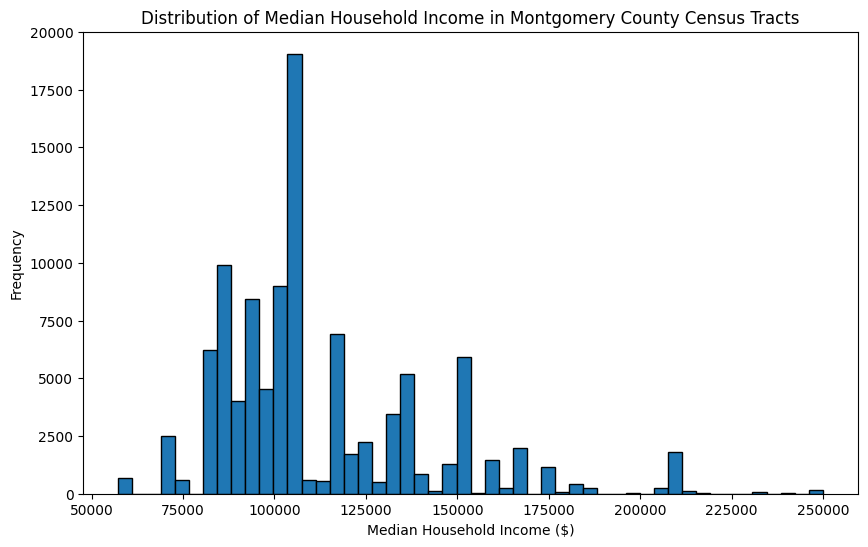

In [10]:
# Histogram of household median income by census tract

plt.figure(figsize=(10,6))
plt.hist(tows['median_household_income'], bins=50, edgecolor='black')

plt.xlabel('Median Household Income ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Household Income in Montgomery County Census Tracts')

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(tows['median_household_income'], bins=50, edgecolor='black')

plt.xlabel('Median Household Income ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Household Income in Montgomery County Census Tracts')

plt.show()

In [5]:

tows.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Tow Date', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Tow Reason', 'Storage Company',
       'Notes', 'Incident Date', 'Location', 'City', 'Geo-location field',
       'coord', 'lon', 'lat', 'geoid', 'TractFIPS', 'Reason for tow',
       'Trade Name', 'tract_only', 'state', 'county', 'fips_no_block',
       'median_household_income', 'foreign_born_population',
       'speak_only_english', 'total_population',
       'means_of_transportation_to_work_car_truck_or_van'],
      dtype='object')

##### What is the distribution of proportions of households that speak only English at home accross Census tracts in Montgomery County?

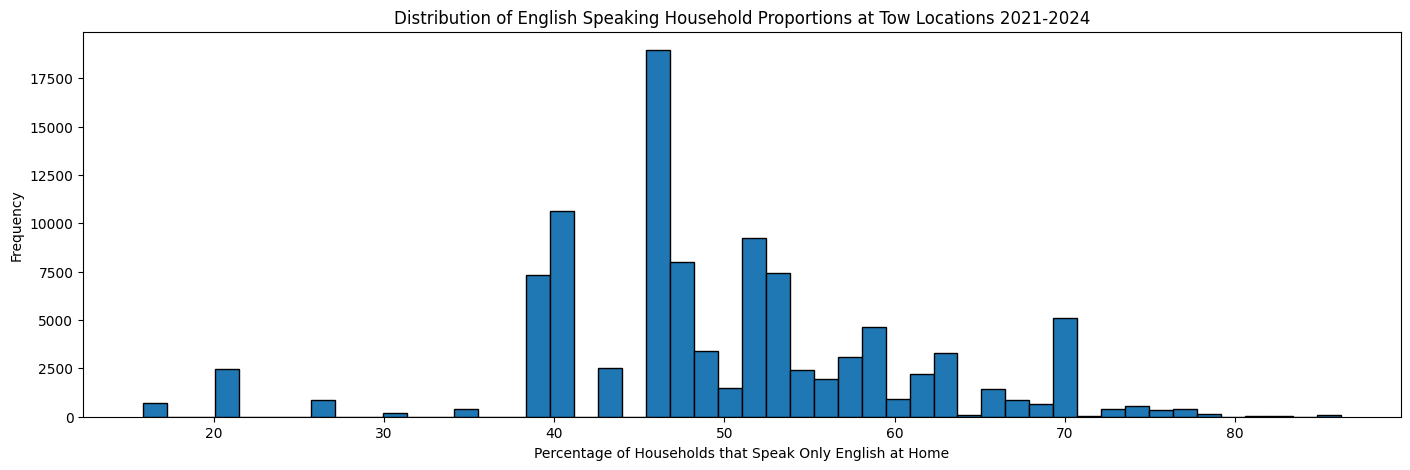

In [41]:
tows['english_only_prop'] = tows['speak_only_english'] / tows['total_population'] * 100

plt.figure(figsize=(17,5))
plt.hist(tows['english_only_prop'], bins=50, edgecolor='black')

plt.xlabel('Percentage of Households that Speak Only English at Home')
plt.ylabel('Frequency')
plt.title('Distribution of English Speaking Household Proportions at Tow Locations 2021-2024')

plt.show()

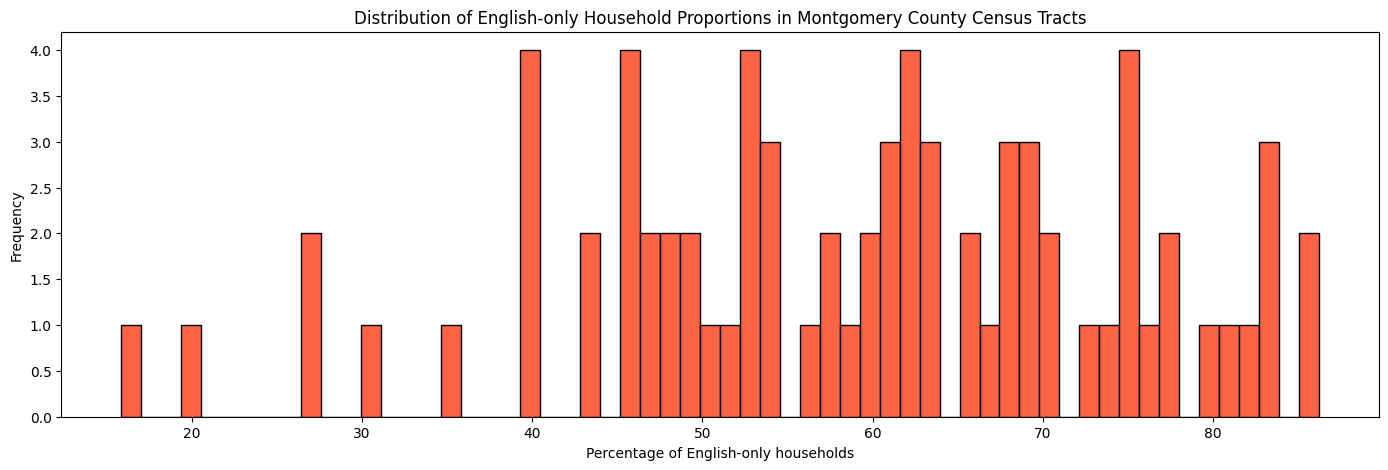

In [40]:
acs_data['english_only_prop'] = acs_data['speak_only_english'] / acs_data['total_population'] * 100

plt.figure(figsize=(17,5))
plt.hist(acs_data['english_only_prop'], bins=60, edgecolor='black', color='#fb6444')

plt.xlabel('Percentage of English-only households')
plt.ylabel('Frequency')
plt.title('Distribution of English-only Household Proportions in Montgomery County Census Tracts')

plt.show()

##### What is the distribution of proportions of foreign-born households accross Census tracts in Montgomery County? The spread?

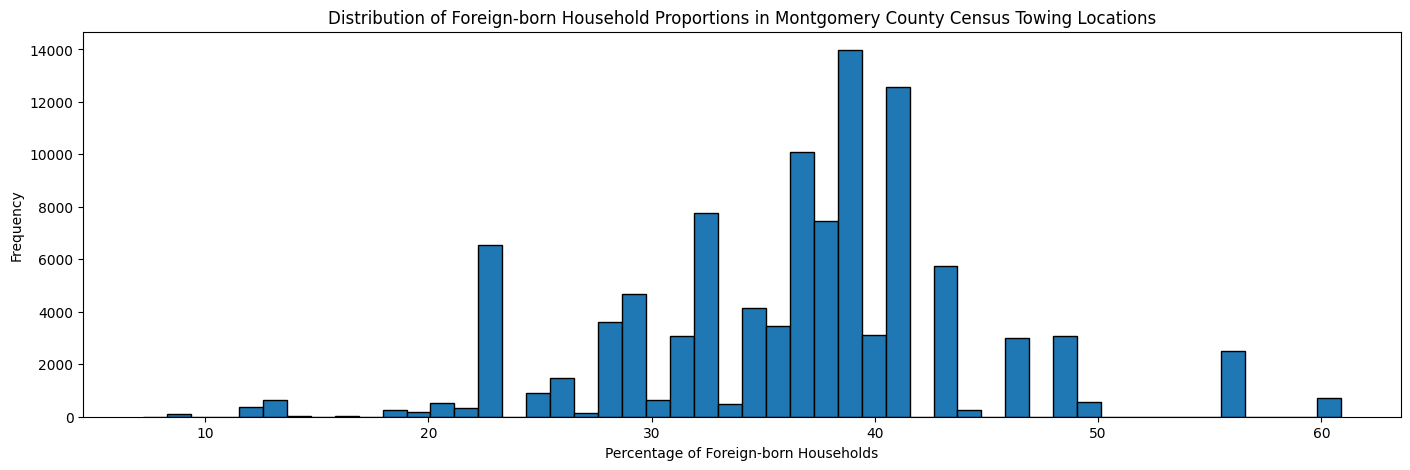

In [22]:
tows['foreign_prop'] = tows['foreign_born_population'] / tows['total_population'] * 100

plt.figure(figsize=(17,5))
plt.hist(tows['foreign_prop'], bins=50, edgecolor='black')

plt.xlabel('Percentage of Foreign-born Households')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign-born Household Proportions in Montgomery County Census Towing Locations')

plt.show()

In [15]:
tows['foreign_prop'].describe()

count   102429
mean        36
std          8
min          7
25%         32
50%         38
75%         40
max         61
Name: foreign_prop, dtype: float64

75% of the tows in Montgomery County happened in census tracts where at least 32% of households consist of foreign-born families, with some at as much as 61%. How does this compare to the overall distribution of foreign-born households in all Montgomery County census tracts?

In [16]:

acs_data = pd.read_csv('acs_data.csv')

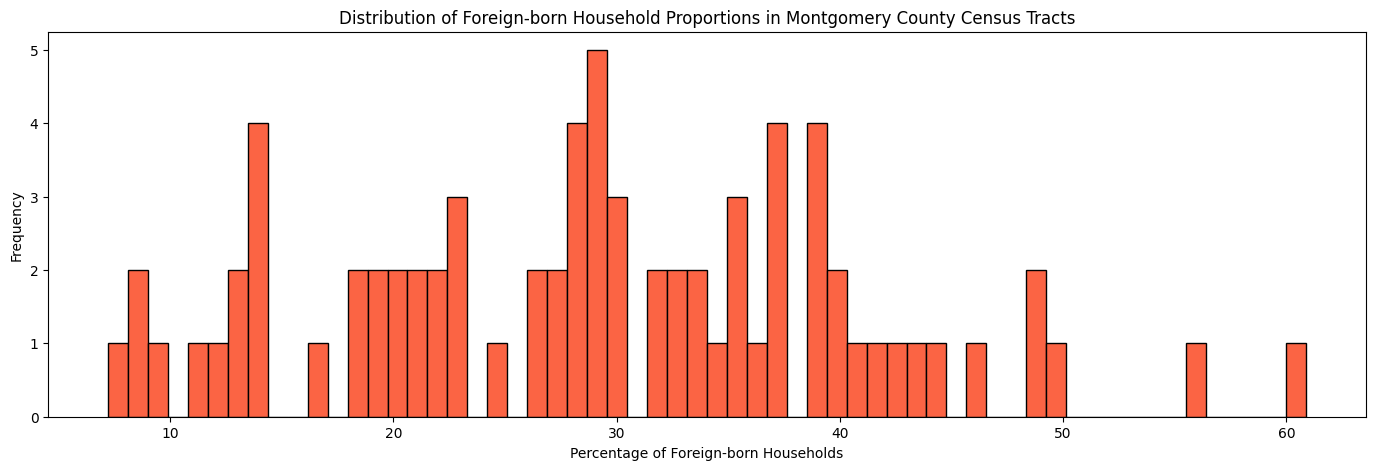

In [26]:
acs_data['foreign_born_prop'] = acs_data['foreign_born_population'] / acs_data['total_population'] * 100

plt.figure(figsize=(17,5))
plt.hist(acs_data['foreign_born_prop'], bins=60, edgecolor='black', color='#fb6444')

plt.xlabel('Percentage of Foreign-born Households')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign-born Household Proportions in Montgomery County Census Tracts')

plt.show()

In [27]:
acs_data['foreign_born_prop'].describe()

count   75
mean    29
std     12
min      7
25%     21
50%     29
75%     37
max     61
Name: foreign_born_prop, dtype: float64

In [75]:
# Create df of tow counts by census tract
tows_by_tract = tows.groupby('tract_only'). agg({
    'median_household_income': 'mean',
    'tract_only': 'count'
}).rename(columns={
    'tract_only': 'case_count'  # Rename the count column
}).reset_index()

# Filter out tracts from outside of Montgomery County
tows_by_tract = tows_by_tract[tows_by_tract['tract_only'] > 70000]
tows_by_tract = tows_by_tract[tows_by_tract['tract_only'] < 71000]

In [ ]:
# Create df of tow counts by census tract
tows_by_tract = tows.groupby('TractFIPS'). agg({
    'median_household_income': 'mean',
    'geoid': 'count',
}).rename(columns={
    'geoid': 'case_count'  # Rename the count column
}).reset_index()

# Filter out tracts from outside of Montgomery County
tows_by_tract = tows_by_tract[tows_by_tract['tract_only'] > 70000]
tows_by_tract = tows_by_tract[tows_by_tract['tract_only'] < 71000]

In [4]:
tows.columns

Index(['Tow Date', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Notes',
       'Location', 'City', 'lon', 'lat', 'geoid', 'Reason for tow',
       'Trade Name', 'TractFIPS', 'cei', 'cat_cei', 'transit_freq',
       'resident_density', 'pop_density', 'employ_density', 'act_density',
       'median_household_income', 'foreign_born_population',
       'speak_only_english', 'total_population',
       'means_of_transportation_to_work_car_truck_or_van'],
      dtype='object')

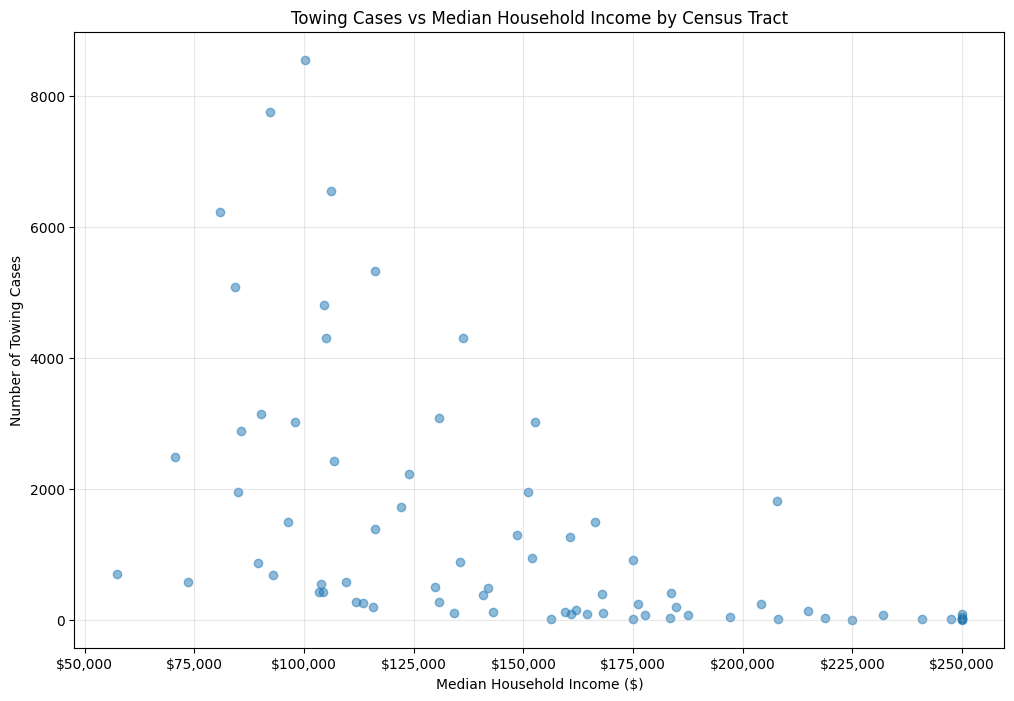

In [78]:
plt.figure(figsize=(12, 8))
plt.scatter(tows_by_tract['median_household_income'], 
           tows_by_tract['case_count'], 
           alpha=0.5)

plt.xlabel('Median Household Income ($)')
plt.ylabel('Number of Towing Cases')
plt.title('Towing Cases vs Median Household Income by Census Tract')

# Format x-axis to show dollars with commas
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.grid(True, alpha=0.3)

plt.show()

In [79]:
len(tows_by_tract)

75

In [80]:
tows_by_tract_220000 = tows_by_tract[tows_by_tract['median_household_income'] > 220000]

In [82]:
tows_by_tract_220000['case_count'].sum()

261

In [13]:
import plotly.express as px

# Group the data by reason and count frequencies
reason_counts = df['Reason for tow'].value_counts().reset_index()
reason_counts.columns = ['Reason', 'Count']

# Create treemap
fig = px.treemap(
    reason_counts,
    path=['Reason'],
    values='Count',
    title='Distribution of Tow Reasons (2021-2024)',
    color_discrete_sequence=px.colors.qualitative.T10
)

# Update layout
fig.update_layout(
    width=800,
    height=600,
    title_x=0.5,  # Center the title
)

# Update traces to show both reason and count in hover text
fig.update_traces(
    textinfo='label+value',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<extra></extra>',
    textposition="middle center",  # Center the text
    textfont=dict(size=12)
)

fig.show()

fig.write_html('tow_reason_treemap.html')

In [14]:
complaints = pd.read_csv('FY24 Trespass Tow Complaints(FY24 Trespass Tow Cases).csv',
                         parse_dates=['Create Date', 'Assigned Date', 'Closed Date'],
                         encoding='latin-1')

In [30]:
complaints['Practice'].unique()

array(['Towing - Unauthorized',
       'Towing - Insufficient Signage, Towing - Unauthorized',
       'Towing - Predatory, Towing - Unauthorized',
       'Damage Claim, Towing - Unauthorized', 'Towing - Predatory',
       'Damage Claim',
       'Towing - Insufficient Signage, Towing - Unauthorized, Unlicensed',
       'Pricing - Excessive', 'Fraud/Scam', 'Service - Unsatisfactory',
       'Towing - Insufficient Signage',
       'Service - Unsatisfactory, Towing - Unauthorized',
       'Pricing - Excessive, Towing - Unauthorized',
       'Residential Tenancy, Towing - Insufficient Signage, Towing - Predatory, Towing - Unauthorized',
       'Towing - Unauthorized, Unfair Trade Practice',
       'Damage Claim, Towing - Insufficient Signage, Towing - Unauthorized'],
      dtype=object)

In [4]:
# Replace variations of Henry's Wrecker Service with the correct spelling
complaints['Merchant'] = complaints['Merchant'].replace({
    'Henry Wrecker Service': "Henry's Wrecker Service",
    "HENRY'S TOWING": "Henry's Wrecker Service",
    "Henry's wrecker servicce": "Henry's Wrecker Service",
    "Henery's Wrecker Service": "Henry's Wrecker Service",
    "Henry's Towing": "Henry's Wrecker Service",
    'Authorized Towing LLC': 'Authorized Towing',
    'Speedy Towing & Recovery': 'Speedy Towing',
    'Speedy Towing, Inc.': 'Speedy Towing',
    'Speeding Towing LLC, DBA Speedy Towing': 'Speedy Towing',
    'Prestige Towing': 'Prestige Autow',
    'Prestige Towing & Recovery': 'Prestige Autow'

})

In [5]:
complaints['Unauthorized'] = complaints['Practice'].str.contains('Unauthorized', case=True).astype(int)
complaints['Insufficient Signage'] = complaints['Practice'].str.contains('Insufficient Signage', case=True).astype(int)
complaints['Predatory'] = complaints['Practice'].str.contains('Predatory', case=True).astype(int)
complaints['Damage Claim'] = complaints['Practice'].str.contains('Damage Claim', case=True).astype(int)
complaints['Unlicensed'] = complaints['Practice'].str.contains('Unlicensed', case=True).astype(int)
complaints['Excessive Pricing'] = complaints['Practice'].str.contains('Pricing - Excessive', case=True).astype(int)

In [6]:
complaint_companies = complaints.groupby('Merchant').size().sort_values(ascending=False)

In [29]:
complaint_practice = complaints.groupby('Practice').size().sort_values(ascending=False)

In [32]:
import plotly.express as px

# Create a count of unauthorized vs authorized complaints
unauthorized_counts = complaints['Unauthorized'].value_counts().reset_index()
unauthorized_counts.columns = ['Type', 'Count']
unauthorized_counts['Type'] = unauthorized_counts['Type'].map({1: 'Unauthorized', 0: 'Other'})

# Create bar graph
fig = px.bar(
    unauthorized_counts,
    x='Type',
    y='Count',
    title='Distribution of Unauthorized vs Other Towing Complaints',
    color='Type',
    color_discrete_sequence=px.colors.qualitative.T10,
    text='Count'  # Display count on bars
)

# Update layout
fig.update_layout(
    width=800,
    height=500,
    title_x=0.5,  # Center title
    showlegend=False,  # Hide legend since colors are self-explanatory
    xaxis_title="Complaint Type",
    yaxis_title="Number of Complaints"
)

# Update text position
fig.update_traces(
    textposition='outside',
    textfont=dict(size=14)
)

fig.show()

In [34]:
import plotly.express as px

# Create a count of insufficient signage vs other complaints
signage_counts = complaints['Insufficient Signage'].value_counts().reset_index()
signage_counts.columns = ['Type', 'Count']
signage_counts['Type'] = signage_counts['Type'].map({1: 'Insufficient Signage', 0: 'Other'})

# Create bar graph
fig = px.bar(
    signage_counts,
    x='Type',
    y='Count',
    title='Distribution of Insufficient Signage vs Other Towing Complaints',
    color='Type',
    color_discrete_sequence=px.colors.qualitative.T10,
    text='Count'  # Display count on bars
)

# Update layout
fig.update_layout(
    width=800,
    height=500,
    title_x=0.5,  # Center title
    showlegend=False,  # Hide legend since colors are self-explanatory
    xaxis_title="Complaint Type",
    yaxis_title="Number of Complaints"
)

# Update text position
fig.update_traces(
    textposition='outside',
    textfont=dict(size=14)
)

fig.show()

In [36]:
import plotly.express as px

# Create a count of predatory vs other complaints
predatory_counts = complaints['Predatory'].value_counts().reset_index()
predatory_counts.columns = ['Type', 'Count']
predatory_counts['Type'] = predatory_counts['Type'].map({1: 'Predatory', 0: 'Other'})

# Create bar graph
fig = px.bar(
    predatory_counts,
    x='Type',
    y='Count',
    title='Distribution of Predatory vs Other Towing Complaints',
    color='Type',
    color_discrete_sequence=px.colors.qualitative.T10,
    text='Count'  # Display count on bars
)

# Update layout
fig.update_layout(
    width=800,
    height=500,
    title_x=0.5,  # Center title
    showlegend=False,  # Hide legend since colors are self-explanatory
    xaxis_title="Complaint Type",
    yaxis_title="Number of Complaints"
)

# Update text position
fig.update_traces(
    textposition='outside',
    textfont=dict(size=14)
)

fig.show()

In [38]:
import plotly.express as px

# Create a count of damage claim vs other complaints
damage_counts = complaints['Damage Claim'].value_counts().reset_index()
damage_counts.columns = ['Type', 'Count']
damage_counts['Type'] = damage_counts['Type'].map({1: 'Damage Claim', 0: 'Other'})

# Create bar graph
fig = px.bar(
    damage_counts,
    x='Type',
    y='Count',
    title='Distribution of Damage Claim vs Other Towing Complaints',
    color='Type',
    color_discrete_sequence=px.colors.qualitative.T10,
    text='Count'  # Display count on bars
)

# Update layout
fig.update_layout(
    width=800,
    height=500,
    title_x=0.5,  # Center title
    showlegend=False,  # Hide legend since colors are self-explanatory
    xaxis_title="Complaint Type",
    yaxis_title="Number of Complaints"
)

# Update text position
fig.update_traces(
    textposition='outside',
    textfont=dict(size=14)
)

fig.show()

In [40]:
import plotly.express as px

# Create a count of unlicensed vs other complaints
unlicensed_counts = complaints['Unlicensed'].value_counts().reset_index()
unlicensed_counts.columns = ['Type', 'Count']
unlicensed_counts['Type'] = unlicensed_counts['Type'].map({1: 'Unlicensed', 0: 'Other'})

# Create bar graph
fig = px.bar(
    unlicensed_counts,
    x='Type',
    y='Count',
    title='Distribution of Unlicensed vs Other Towing Complaints',
    color='Type',
    color_discrete_sequence=px.colors.qualitative.T10,
    text='Count'  # Display count on bars
)

# Update layout
fig.update_layout(
    width=800,
    height=500,
    title_x=0.5,  # Center title
    showlegend=False,  # Hide legend since colors are self-explanatory
    xaxis_title="Complaint Type",
    yaxis_title="Number of Complaints"
)

# Update text position
fig.update_traces(
    textposition='outside',
    textfont=dict(size=14)
)

fig.show()

In [42]:
import plotly.express as px

# Create a count of excessive pricing vs other complaints
pricing_counts = complaints['Excessive Pricing'].value_counts().reset_index()
pricing_counts.columns = ['Type', 'Count']
pricing_counts['Type'] = pricing_counts['Type'].map({1: 'Excessive Pricing', 0: 'Other'})

# Create bar graph
fig = px.bar(
    pricing_counts,
    x='Type',
    y='Count',
    title='Distribution of Excessive Pricing vs Other Towing Complaints',
    color='Type',
    color_discrete_sequence=px.colors.qualitative.T10,
    text='Count'  # Display count on bars
)

# Update layout
fig.update_layout(
    width=800,
    height=500,
    title_x=0.5,  # Center title
    showlegend=False,  # Hide legend since colors are self-explanatory
    xaxis_title="Complaint Type",
    yaxis_title="Number of Complaints"
)

# Update text position
fig.update_traces(
    textposition='outside',
    textfont=dict(size=14)
)

fig.show()

In [43]:
complaints['Disposition Description'].unique()

array(['RESOLVED:  Citation Issued',
       'RESOLVED:  Acceptable explanation - Merchant provides an acceptable explanation for action/inaction.  (Ex. no damage, item outside warranty period.)',
       'RESOLVED:  FULL Refund - Consumer receives FULL refund based Investigator-Validated amount.',
       'RESOLVED:  Consumer withdrew complaint - Consumer withdraws complaint either by expressly requesting a withdrawal or by failing to communicate with OCP.',
       'REFERRED:  Consumer agency in another state or county',
       'REFERRED:  Montgomery County agency',
       'RESOLVED:  Consumer obtained other requested relief - Complaint is resolved and did not involve refund, goods, repair, or business practice complained about.  Ex. Consumer requested/received an apology.',
       'REFERRED:  MD State Government agency',
       'RESOLVED:  PARTIAL REFUND - Consumer receives a PARTIAL refund based on Investigator-Validated amount.',
       'Complaint filed for informational purposes only

In [50]:
# Group by Trade Name and count tows
top_companies = df.groupby('Trade Name').size().sort_values(ascending=False).head(5)

print("Number of tows by top 5 companies:")
for company, count in top_companies.items():
    print(f"{company}: {count:,} tows")

# Calculate percentage of total tows
total_tows = len(df)
top_5_total = top_companies.sum()
percentage = (top_5_total / total_tows) * 100

print(f"\nTotal tows by top 5 companies: {top_5_total:,}")
print(f"Percentage of all tows: {percentage:.1f}%")

Number of tows by top 5 companies:
Henry's Wrecker Service: 36,573 tows
Authorized Towing: 16,478 tows
Prestige: 9,994 tows
Speedy Towing: 7,248 tows
Big Tow: 3,580 tows

Total tows by top 5 companies: 73,873
Percentage of all tows: 79.4%


In [54]:
df.groupby('TractFIPS').size().describe()

count    249
mean     373
std      561
min        1
25%        6
50%      103
75%      521
max     3053
dtype: float64

In [56]:
len(df['TractFIPS'].unique())

250

In [51]:
df.groupby()

Index(['Tow Date', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Notes',
       'Location', 'City', 'lon', 'lat', 'geoid', 'Reason for tow',
       'Trade Name', 'TractFIPS', 'cei', 'cat_cei', 'transit_freq',
       'resident_density', 'pop_density', 'employ_density', 'act_density',
       'median_household_income', 'foreign_born_population',
       'speak_only_english', 'total_population',
       'means_of_transportation_to_work_car_truck_or_van'],
      dtype='object')